##  Introduction: 
### I want to compare the 73 neighborhoods in Barcelona on 3 main subjects: variety of venues (using foursquare API), the rental prices of appartaments and the criminality index. 
### The main objective of this work is to provide the stakeholders with relevant information to decision making.

## Data
### I´ll use 3 data sources:
#### The foursquare API
####  Appartment rental prices per neighborhood - ttps://www.bcn.cat/estadistica/castella/dades/timm/ipreus/habllo/a2020/tbarris2.htm
#### Criminality rates per borough - http://www.bcn.cat/estadistica/catala/dades/anuari/Anuari2020_AAFF.pdf

## Methodology:
### I´ll create  the main dataframe using the sources indicated above. I´ll gather the information, clean and treat it several libraries sucha as: requests, geopy, pandas, bs4. To further explore and analyse I´ll use seaborn and matplotlib libraries. And to plot the information on the map I´ll use folium library.

In [1]:
import pandas as pd
import folium
import requests
from geopy.geocoders import Nominatim
from bs4 import BeautifulSoup
from branca.colormap import linear

## Part 1:

### Build base dataframe that will serve to create the clustering dataframe and also for plotting information on the map.

#### Step 1: Create initial dataframe containing the boroughs and neighborhoods of Barcelona.

In [2]:
#Dictionary containing Barcelona´s boroughs and neighborhoods.
bcn_dict = {"Ciutat Vella":["El Raval", "Barrio Gótico", "La Barceloneta", "Sant Pere, Santa Caterina i la Ribera"],
            "Eixample":["El Fort Pienc", "Sagrada Familia", "Dreta de l'Eixample", "L'Antiga Esquerra de l'Eixample", "La Nova Esquerra de l'Eixample", "Sant Antoni"],
            "Sants-Montjuïc":["Poble Sec", "La Marina del Prat Vermell", "La Marina de Port", "La Font de la Guatlla", "Hostafrancs", "La Bordeta", "Sants-Badal", "Sants", "Zona Franca", "Montjuïc"],
            "Les Corts":["Les Corts", "La Maternitat i Sant Ramon", "Pedralbes"],
            "Sarrià-Sant Gervasi":["Vallvidrera, el Tibidabo i les Planes", "Sarrià", "Las Tres Torres", "Sant Gervasi-Bonanova", "Sant Gervasi-Galvany", "El Putxet i Farró"],
            "Gràcia":["Vallcarca i els Penitents", "El Coll", "La Salut", "Vila de Gràcia", "Camp d'en Grassot i Gràcia Nova"],
            "Horta - Guinardó":["Baix Guinardó", "Can Baró", "El Guinardó", "La Font d'en Fargues", "El Carmelo", "La Teixonera", "Sant Genís dels Agudells", "Montbau", "La Vall d'Hebrón", "La Clota", "Horta"],
            "Nou Barris":["Vilapicina i La Torre Llobeta", "Porta", "Turó de la Peira", "Can Peguera", "La Guineueta", "Canyelles", "Les Roquetes", "Verdún", "La Prosperitat", "La Trinitat Nova", "Torre Baró", "Ciudad Meridiana", "Vallbona"],
            "Sant Andreu":["La Trinitat Vella", "Baró de Viver", "El Buen Pastor", "San Andrés", "La Sagrera", "Congrés i els Indians", "Navas"],
            "Sant Martí":["El Camp de l'Arpa del Clot", "El Clot", "El Parc i la Llacuna del Poblenou", "La Vila Olímpica del Poblenou", "Poble Nou", "Diagonal Mar i Front Marítim del Poblenou", "El Besòs i el Maresme", "Provençals del Poblenou", "Sant Martí de Provençals", "La Verneda i la Pau"]
            }

In [3]:
#Create list in the format that we can use to build the final df (repeating the borough name for each neihhbohood contained in it).
b_n_list = []
for key in bcn_dict.keys():
    for value in bcn_dict[key]:
        #print(key, value)
        b_n_list.append([key, value])

In [4]:
bor_nei_df = pd.DataFrame(b_n_list, columns=['Borough', 'Neighborhood'])

In [5]:
#bor_nei_df.head()

#### Step 2: Obtain latitudes and longitudes and add them to the main dataframe, bor_nei_df.

In [6]:
geocoder = Nominatim(user_agent='explore_bcn')

In [7]:
nbhoods_ll = []

for n in bor_nei_df['Neighborhood']:
    nbhoods_ll.append([n, geocoder.geocode(n+', Barcelona').latitude, geocoder.geocode(n+', Barcelona').longitude])

In [8]:
nbhoods_final = pd.DataFrame(nbhoods_ll, columns=['Neighborhood', 'Latitude', 'Longitude'])

In [9]:
bor_nei_df = bor_nei_df.merge(nbhoods_final, on='Neighborhood')

In [10]:
#bor_nei_df.head()

#### Step 3: Include prices per m2 for each neighborhood on main dataframe, bor_nei_df.
Source: https://www.bcn.cat/estadistica/castella/dades/timm/ipreus/habllo/a2020/tbarris2.htm

In [11]:
prices_nbhood = pd.read_excel('D:\Fernando\Programming\GitHub\Coursera-Final-Project/ALQUILERES_BCN.xlsx')

In [15]:
#pd.set_option('display.max_rows', None)
#prices_nbhood.head()

In [14]:
#Loop through the neighborhoods on nbhoods_final...
#loop through the neighborhoods on prices_nbhood...
#if the neighborhoods names match, extract it´s price and append to prices list.

prices = []
for e, n in enumerate(bor_nei_df['Neighborhood']):
    for neib, price in zip(prices_nbhood['BARRIO'], prices_nbhood['PRECIO/M2']):
        if n.lower() in neib.lower():
            #print(e, n, price)
            prices.append([n, price])
            break
        else:
            continue

In [16]:
len(prices)

75

In [13]:
#Had to change some neighborhoods´ names on the prices_nbhood df because some of the names were different, 
#therefore the loop above wasn´t picking them and was returning fewer prices than it was supposed to return.

#prices_nbhood['BARRIO'].replace({prices_nbhood['BARRIO'].iloc[1]:'Barrio Gótico',
#                                prices_nbhood['BARRIO'].iloc[5]:"Sagrada Familia",
#                                 prices_nbhood['BARRIO'].iloc[16]:"Sants-Badal",
#                                 prices_nbhood['BARRIO'].iloc[23]:"Las Tres Torres",
#                                 prices_nbhood['BARRIO'].iloc[24]:"Sant Gervasi-Bonanova",
#                                 prices_nbhood['BARRIO'].iloc[25]:"Sant Gervasi-Galvany",
#                                 prices_nbhood['BARRIO'].iloc[26]:"El Putxet i Farró",
#                                 prices_nbhood['BARRIO'].iloc[36]:"El Carmelo",
#                                 prices_nbhood['BARRIO'].iloc[40]:"La Vall d'Hebrón",
#                                 prices_nbhood['BARRIO'].iloc[50]:"Verdún",
#                                 prices_nbhood['BARRIO'].iloc[54]:"Ciudad Meridiana",
#                                 prices_nbhood['BARRIO'].iloc[58]:"El Buen Pastor",
#                                 prices_nbhood['BARRIO'].iloc[59]:"San Andrés",
#                                 prices_nbhood['BARRIO'].iloc[67]:"Poble Nou",
#                                 prices_nbhood['BARRIO'].iloc[68]:"Diagonal Mar i Front Marítim del Poblenou"}, inplace=True)

In [17]:
#Create prices df to be merged to the main one.
neib_prices_df = pd.DataFrame(prices, columns=['Neighborhood', 'Price/m2'])
#neib_prices_df.head()

In [18]:
#Merge dfs.
bor_nei_df = bor_nei_df.merge(neib_prices_df, on='Neighborhood')

In [19]:
#bor_nei_df.head()

#### Step 4: Include criminality rates for the boroughs (we haven´t found by neighborhood) on main dataframe, bor_nei_df.

Source: http://www.bcn.cat/estadistica/catala/dades/anuari/Anuari2020_AAFF.pdf (pg 213)

Disclaimer: The data we have is from 2019.

In [20]:
#Create df containing the rates.
crim_rates = pd.DataFrame({'Criminal Complaints':[50.436, 59.552, 25.658, 8.627, 11.118, 9.722, 9.996, 9.226, 12.017, 27.481],
                           'Borough':['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia', 'Horta - Guinardó', 'Nou Barris', 'Sant Andreu', 'Sant Martí']})
#crim_rates

In [42]:
#Merge dfs.
bor_nei_df = bor_nei_df.merge(crim_rates, on='Borough')

In [43]:
#bor_nei_df.head()

#### Step 5: Add the venues for each neighborhood on main dataframe, bor_nei_df, and create new final df, bcn_final_df.

In [21]:
#Define basic variables to access Foursquare API
client_id = 'JBNOEBFU0GHRI2C3THTWEL2YB10W5T1GZYK2PLQAWRYVYP55'
client_secret = 'CBDS3XXE2XT4JCY3JHM42GYUGNJZSZHUL3E5QMXHLT3WYQGA'    
version='20180605'
radius=600
limit=100

In [22]:
#Test connection
#lat = bor_nei_df['Latitude'][0]
#lng = bor_nei_df['Longitude'][0]

#url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#    client_id, 
#    client_secret, 
#    version, 
#    lat, 
#    lng, 
#    radius, 
#    limit)

#url

In [23]:
#Test
#results = requests.get(url)

In [24]:
#Test
#results.json()['response']['groups'][0]['items']

In [25]:
#Define function to separate and extract the relevant information of all the venues and transform it to a dataframe
def getBarcelonaVenues(neighborhood, lat, long):
    
    #Create list that will be used to create the dataframe
    venues_list = []
    
    #Loop through all the neighborhoods using Fourquare API, fetch all results for each neighborhood...
    for neighborhood, lat, long in zip(bor_nei_df.Neighborhood, bor_nei_df.Latitude, bor_nei_df.Longitude):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            version, 
            lat, 
            long, 
            radius, 
            limit)
        
        #...store the venues´ information in the 'results' variable...
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        #...loop through each result in results, append the neighborhood name (from the 1st loop),
        #and: venue name, lat, long and category (from 2nd loop) to 'venues_list'.
        for r in results:
            try:
                venues_list.append([neighborhood, r['venue']['name'], r['venue']['location']['lat'], r['venue']['location']['lng'], r['venue']['categories'][0]['name']])
            except:
                pass
    
    #Return dataframe built with 'venues_list' (observe that 'venues_list' is a nested list)
    return pd.DataFrame(venues_list, columns=['Neighborhood', 'Venue Name', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])

In [26]:
#Create dataframe using the function above.
bcn_venues_df = getBarcelonaVenues(bor_nei_df['Neighborhood'], bor_nei_df['Latitude'], bor_nei_df['Longitude'])

In [27]:
#bcn_venues_df.head()

In [28]:
#Check how many venues we got per neighborhood.
#bcn_venues_df.groupby('Neighborhood').count()

In [29]:
#Create final dataframe.
bcn_final_df = bor_nei_df.merge(bcn_venues_df, on='Neighborhood')

In [30]:
bcn_final_df.head()

,Borough,Neighborhood,Latitude,Longitude,Price/m2,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Ciutat Vella,El Raval,41.379518,2.168368,14.3,Arume,41.378953,2.166008,Spanish Restaurant
1,Ciutat Vella,El Raval,41.379518,2.168368,14.3,A Tu Bola,41.380096,2.169054,Tapas Restaurant
2,Ciutat Vella,El Raval,41.379518,2.168368,14.3,La Robadora,41.379500,2.170463,Gastropub
3,Ciutat Vella,El Raval,41.379518,2.168368,14.3,Chulapio,41.379264,2.165905,Cocktail Bar
4,Ciutat Vella,El Raval,41.379518,2.168368,14.3,Grey Street,41.380848,2.166609,Gift Shop


## Part 2
### Exploration and Visualization of the information we have so far.

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#Print all unique venues´ categories in order to have an idea of what we have in each neighborhood.
for n in bcn_final_df['Neighborhood'].unique():
    print('-------------'+n+'-------------')
    print(bcn_final_df[bcn_final_df['Neighborhood']==n]['Venue Category'].value_counts())
    print('---------------------------------------')

-------------El Raval-------------
Spanish Restaurant               7
Bar                              7
Cocktail Bar                     7
Tapas Restaurant                 6
Mediterranean Restaurant         5
Pizza Place                      4
Café                             3
Restaurant                       3
Bookstore                        3
Vegetarian / Vegan Restaurant    3
Theater                          3
Market                           2
Monument / Landmark              2
Sandwich Place                   2
Japanese Restaurant              2
Mexican Restaurant               2
Hotel                            2
Jazz Club                        2
Burger Joint                     2
Gift Shop                        1
Bagel Shop                       1
Beer Bar                         1
Hostel                           1
Record Shop                      1
Opera House                      1
Wine Bar                         1
Donut Shop                       1
Shoe Store          

Name: Venue Category, dtype: int64
---------------------------------------
-------------Poble Sec-------------
Tapas Restaurant                17
Pizza Place                      6
Café                             5
Mediterranean Restaurant         5
Italian Restaurant               4
Cocktail Bar                     4
Hotel                            4
Seafood Restaurant               3
Coffee Shop                      3
Ice Cream Shop                   3
Bar                              3
Japanese Restaurant              2
Asian Restaurant                 2
Mexican Restaurant               2
Theater                          2
Burger Joint                     2
Spanish Restaurant               2
Beer Bar                         2
Gastropub                        2
Bakery                           2
Peruvian Restaurant              2
Restaurant                       2
Gay Bar                          1
Taco Place                       1
History Museum                   1
Theme Park Rid

---------------------------------------
-------------Can Baró-------------
Spanish Restaurant      4
Tapas Restaurant        3
Plaza                   3
Chinese Restaurant      2
Dessert Shop            2
Grocery Store           2
Bar                     1
Soccer Field            1
Restaurant              1
Pool                    1
Soccer Stadium          1
Tennis Court            1
Café                    1
Park                    1
Italian Restaurant      1
Breakfast Spot          1
Gym                     1
Historic Site           1
Cambodian Restaurant    1
Scenic Lookout          1
Bookstore               1
Name: Venue Category, dtype: int64
---------------------------------------
-------------El Guinardó-------------
Tapas Restaurant          3
Plaza                     2
Restaurant                2
Gym                       2
Breakfast Spot            2
Chinese Restaurant        1
Argentinian Restaurant    1
Playground                1
Hotel                     1
Mexican Restau

Name: Venue Category, dtype: int64
---------------------------------------
-------------Torre Baró-------------
Plaza            2
Metro Station    1
Train Station    1
Name: Venue Category, dtype: int64
---------------------------------------
-------------Ciudad Meridiana-------------
Soccer Field          1
Spanish Restaurant    1
Tapas Restaurant      1
Metro Station         1
Park                  1
Name: Venue Category, dtype: int64
---------------------------------------
-------------Vallbona-------------
Light Rail Station          1
Mediterranean Restaurant    1
Gym Pool                    1
Train Station               1
Name: Venue Category, dtype: int64
---------------------------------------
-------------La Trinitat Vella-------------
Park                  1
Supermarket           1
Tapas Restaurant      1
Metro Station         1
Soccer Field          1
Spanish Restaurant    1
Business Service      1
Name: Venue Category, dtype: int64
---------------------------------------
-

Name: Venue Category, dtype: int64
---------------------------------------


#### Step 1: Create new unified dataframe, nbhood_venues_cat, showing the category of the venues and the number of occurrences, per neigborhood.

In [33]:
#Define function to get all unique venues and their quantity for a given neighborhood and create a dataframe with these values.
def getNbhoodVenues(neighborhood):
    
    #Create the base df with unique venues and their number of occurrences.
    df = pd.DataFrame(bcn_final_df[bcn_final_df['Neighborhood']==neighborhood]['Venue Category'].value_counts(), columns=['Venue Category', '# of venues'])
    
    #Correct values in column '# of venues'.
    df['# of venues'] = df['Venue Category']
    
    #Correct values in column 'Venue Category'
    df['Venue Category'] = df.index
    
    #Reset index to finish the correction and have the df formated like we want.
    df.reset_index(drop=True, inplace=True)

    #Create transposed df to show the venues in a sorted way from the more frequent to the less frequent.
    df_transp = df.transpose()
    
    #Add 'Neighborhood' column to transposed df.
    df_transp = df_transp.assign(Neighborhood=neighborhood)
    
    #Set 'Neighborhood' as a 2nd level index.
    df_transp.set_index('Neighborhood', append=True, inplace=True)
    
    #Reorder indexes to set 'Neighborhood' as the 1st one.
    df_transp.index = df_transp.index.reorder_levels([1, 0])
    
    return df_transp

In [34]:
#Create dictionary to receive finished dataframes (for each neighborhood) after passing
#the function above through the loop of neihhborhoods´ names.

#The neighborhoods´ names will be the keys and the finished transposed dataframe will be the values.
nbhoods = {}

#Loop through the length of unique names of neighborhoods,...
for n in range(0, len(bcn_final_df['Neighborhood'].unique())+1):
    #...loop through the names of neighborhoods...
    for nbhd in bcn_final_df['Neighborhood'].unique():
        #... and assign key(neighborhood name) and value(finished transposed df) to the dictionary.
        nbhoods[nbhd] = getNbhoodVenues(nbhd)

In [35]:
#Create new final transposed dataframe using the first key of the previously created dictionary.
nbhood_venues_cat = nbhoods['El Raval']

#Loop through all the keys (excluding the first one) and append all other finisehd dfs to the first one created.
for key in nbhoods.keys():    
    if key == 'El Raval':
        pass
    else:
        nbhood_venues_cat = nbhood_venues_cat.append(nbhoods[key])

In [36]:
pd.set_option('display.max_columns', None)
nbhood_venues_cat.head()

0                         1   \
Neighborhood                                                                  
El Raval       Venue Category  Spanish Restaurant                       Bar   
               # of venues                      7                         7   
Barrio Gótico  Venue Category    Tapas Restaurant            Ice Cream Shop   
               # of venues                     11                         8   
La Barceloneta Venue Category    Tapas Restaurant  Mediterranean Restaurant   

                                              2                         3   \
Neighborhood                                                                 
El Raval       Venue Category       Cocktail Bar          Tapas Restaurant   
               # of venues                     7                         6   
Barrio Gótico  Venue Category              Plaza  Mediterranean Restaurant   
               # of venues                     6                         6   
La Barceloneta Venue Category  Paella Restaurant                       Bar   

                                                     4                   5   \
Neighborhood                                                                  
El Raval       Venue Category  Mediterranean Restaurant         Pizza Place   
               # of venues                            5                   4   
Barrio Gótico  Venue Category        Italian Restaurant  Spanish Restaurant   
               # of venues                            5                   4   
La Barceloneta Venue Category              Burger Joint  Spanish Restaurant   

                                  6            7                   8   \
Neighborhood                                                            
El Raval       Venue Category   Café   Restaurant           Bookstore   
               # of venues         3            3                   3   
Barrio Gótico  Venue Category    Bar  Coffee Shop               Hotel   
               # of venues         3            3                   3   
La Barceloneta Venue Category  Beach   Restaurant  Seafood Restaurant   

                                                          9             10  \
Neighborhood                                                                 
El Raval       Venue Category  Vegetarian / Vegan Restaurant       Theater   
               # of venues                                 3             3   
Barrio Gótico  Venue Category                   Dessert Shop  Camera Store   
               # of venues                                 3             2   
La Barceloneta Venue Category                          Plaza      Beer Bar   

                                         11                   12  \
Neighborhood                                                       
El Raval       Venue Category        Market  Monument / Landmark   
               # of venues                2                    2   
Barrio Gótico  Venue Category      Wine Bar         Burger Joint   
               # of venues                2                    2   
La Barceloneta Venue Category  Cocktail Bar           Board Shop   

                                           13                   14  \
Neighborhood                                                         
El Raval       Venue Category  Sandwich Place  Japanese Restaurant   
               # of venues                  2                    2   
Barrio Gótico  Venue Category      Shoe Store               Market   
               # of venues                  2                    2   
La Barceloneta Venue Category  Ice Cream Shop               Circus   

                                               15           16  \
Neighborhood                                                     
El Raval       Venue Category  Mexican Restaurant        Hotel   
               # of venues                      2            2   
Barrio Gótico  Venue Category      Sandwich Place    Speakeasy   
               # of venues         

#### Step 2: Plot different graphs showing relevant information.

#### Graph 1: Amount of venues found per neighborhood

In [37]:
venue_count = bcn_venues_df.groupby('Neighborhood').count().sort_values(by='Venue Category')

In [38]:
plot = venue_count['Venue Category']
#plot.head()

In [39]:
plot = pd.DataFrame(plot)

Text(0.5, 1.0, 'Amount of Venues found per Neighborhood')

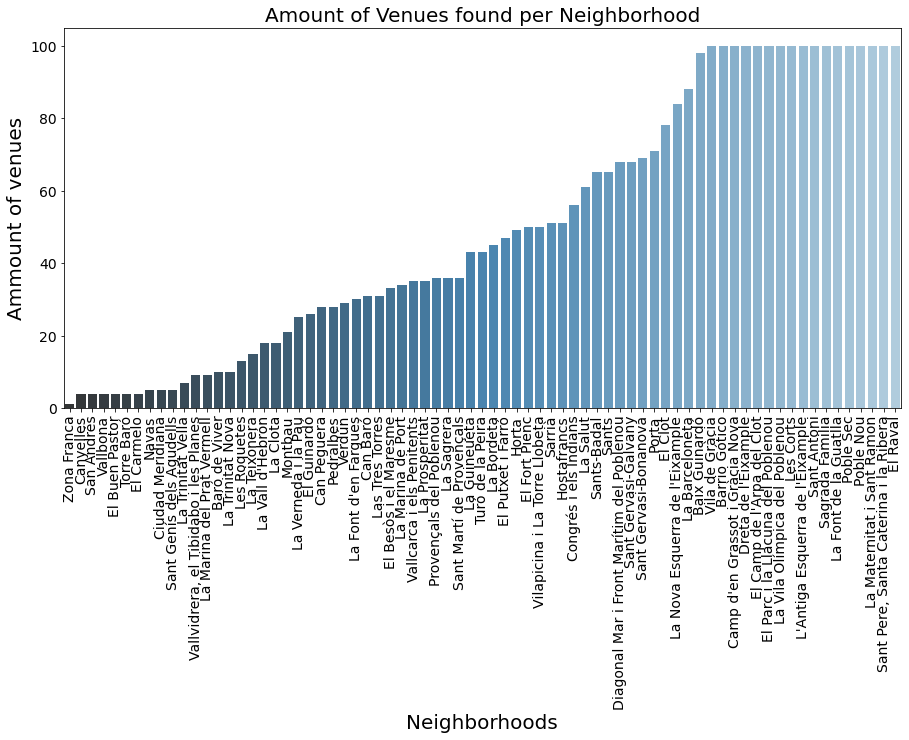

In [40]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation=90, fontsize=14)
sns.barplot(x=plot.index, y=plot['Venue Category'], data=plot, palette='Blues_d')
plt.xlabel(xlabel='Neighborhoods', fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel(ylabel='Ammount of venues', fontsize=20)
plt.title('Amount of Venues found per Neighborhood', fontsize=20)

#### Graph 2: Rental prices of square meter per Neighborhood.

In [44]:
#Separate the df we need.
price_crime_df = bor_nei_df[['Neighborhood', 'Price/m2', 'Criminal Complaints']]

In [45]:
#Check what cells are empty.
#price_crime_df[price_crime_df['Price/m2']=='-\xa0\xa0']

In [46]:
#Correct the price in each cell.

#The correction was made using the mean of the prices available for each neighborhood 
#on the day 07/02/2021 on www.idealista.com.
price_crime_df.at[43, 'Price/m2'] = 12.78
price_crime_df.at[48, 'Price/m2'] = 10.79
price_crime_df.at[57, 'Price/m2'] = 8.75

In [47]:
#price_crime_df.tail()

In [48]:
#Sort values in order to show them ordered by the rental prices.
price_crime_df.sort_values(by='Price/m2', inplace=True)

<ipython-input-48-027143de262e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_crime_df.sort_values(by='Price/m2', inplace=True)


Text(0.5, 1.0, 'Rental prices/m2 per Neigborhood (2020)')

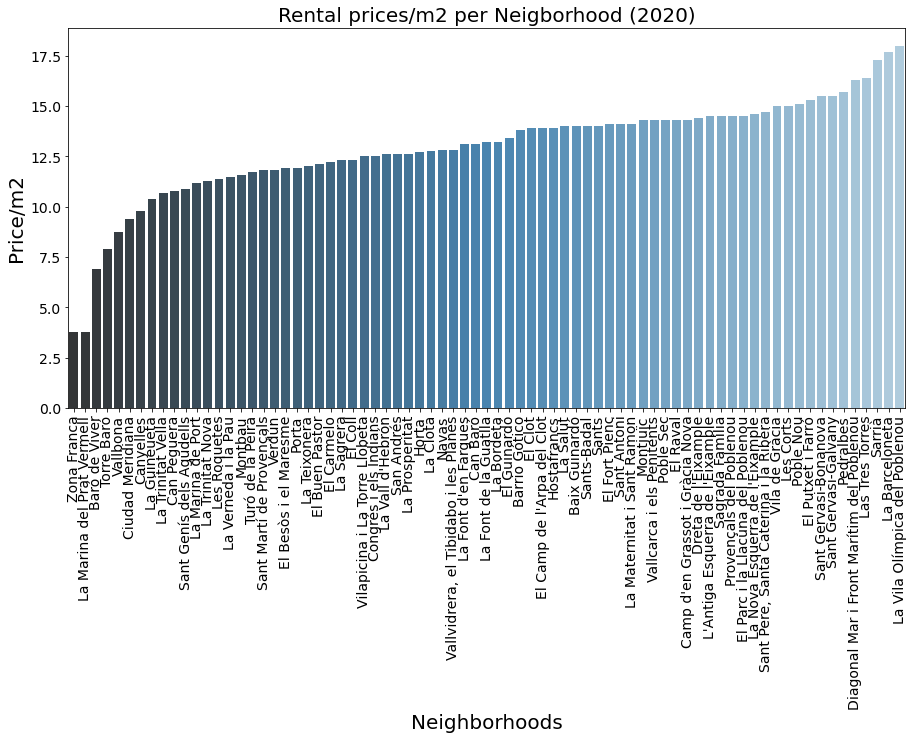

In [49]:
plt.figure(figsize=(15, 7))
sns.barplot(x=price_crime_df['Neighborhood'], y=price_crime_df['Price/m2'], palette='Blues_d')
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Neighborhoods', fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel('Price/m2', fontsize=20)
plt.title('Rental prices/m2 per Neigborhood (2020)', fontsize=20)

#### Graph 3: Criminal complaints per Neighborhood.

In [50]:
#Sort values by criminal complaints.
price_crime_df.sort_values(by='Criminal Complaints', inplace=True)

<ipython-input-50-c21abcfe83b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_crime_df.sort_values(by='Criminal Complaints', inplace=True)


In [51]:
#Because we have a dot(.) marking the numerals on the criminal complaints column, 
#Python undertands them as floats and not integers on the thousands scale.

#So we´ll create a list containg all the values multiplied by 1000 to correct these values.
real_complaints = []
for n in price_crime_df['Criminal Complaints']:
    real_complaints.append(n*1000)

In [52]:
price_crime_df['Criminal Complaints'] = real_complaints

<ipython-input-52-e7299040ec15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_crime_df['Criminal Complaints'] = real_complaints


In [53]:
#price_crime_df.tail()

Text(0.5, 1.0, 'Criminal Complaints per Neighborhood')

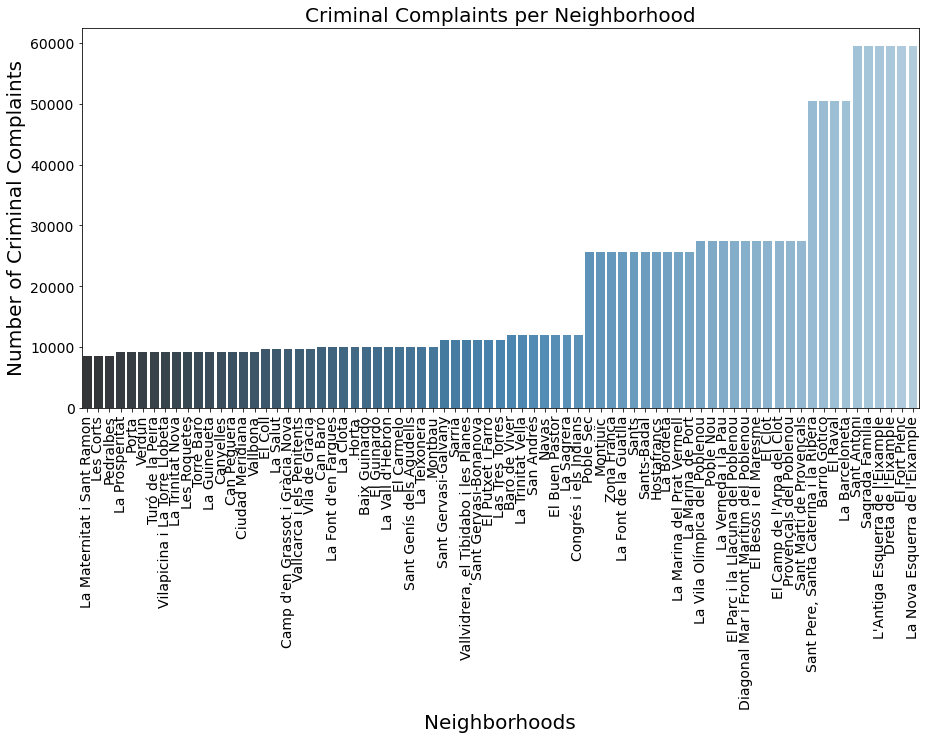

In [54]:
plt.figure(figsize=(15, 7))
sns.barplot(x=price_crime_df['Neighborhood'], y=price_crime_df['Criminal Complaints'], palette='Blues_d')
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Neighborhoods', fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel('Number of Criminal Complaints', fontsize=20)
plt.title('Criminal Complaints per Neighborhood', fontsize=20)

## Part 3
### Prepare data and create new dataframe for clustering.
#### Step 1: Create new dataframe, dummies_cat_df, using 'get_dummies' method to return a column for each venue category (one-hot coding).

In [55]:
dummie_cat_df = pd.get_dummies(bcn_final_df['Venue Category'])
dummie_cat_df.head()

,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Country Dance Club,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Knitting Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Neighborhood,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Road,Rock Climbing Spot,Rock Club,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,Univ

In [56]:
#One of the categories has the name 'Neighborhood' we have to change this in order to prevent 
#any conflict with the Neighborhood column that acctually has their names.

#So we´ll use replace() method before adding back the neighborhood column.
dummie_cat_df.rename({'Neighborhood':'Nbhood'}, inplace=True, axis=1)
#dummie_cat_df['Nbhood']

In [57]:
#After changing that column name, we can put neighborhood column back in df.
dummie_cat_df.insert(0,'Neighborhood', bcn_final_df['Neighborhood'])

In [58]:
#pd.set_option('display.max_columns', None)
#dummie_cat_df.head()

#### Step 2: Group the df by neighborhood.

In [59]:
grouped_df = dummie_cat_df.groupby('Neighborhood').sum()
grouped_df_mean = dummie_cat_df.groupby('Neighborhood').mean()
grouped_df.head()

,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Country Dance Club,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Knitting Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Nbhood,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Road,Rock Climbing Spot,Rock Club,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,Udon Restaurant,University

In [60]:
#Confirming that the mean() was calculated per neighborhood.
#The sum of all categories should be 1.
#print(grouped_df_mean.loc['Baix Guinardó'].sum())
#print(grouped_df_mean.loc['El Raval'].sum())
#print(grouped_df_mean.loc["Camp d'en Grassot i Gràcia Nova"].sum())
#print(grouped_df_mean.loc['Can Baró'].sum())
#print(grouped_df_mean.loc['Pedralbes'].sum())

## Part 4
### Cluster neighborhoods based on their venues´ categories similarity.

In [61]:
from sklearn.cluster import KMeans

#### Step 1.1: Define what´s the best k value using elbow method, on grouped_df, without standardization (as all the values are on the same scale (amount of venues), there souldn´t be any problem clustering without any normalization).

In [62]:
#Checking best k value.
kmeans_scores2 = []
for i in range(1, 21):
    kmeans2 = KMeans(n_clusters=i)
    kmeans_fitted2 = kmeans2.fit(grouped_df)
    kmeans_scores2.append(kmeans_fitted2.inertia_)

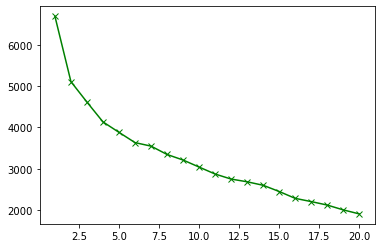

In [63]:
#Plot the graph showing the 'elbow curve'.
plt.plot(range(1, 21), kmeans_scores2, '-gx')

#### Step 1.2: Same procedure, but using grouped_df_mean.

In [64]:
kmeans_scores = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans_fitted = kmeans.fit(grouped_df_mean)
    kmeans_scores.append(kmeans_fitted.inertia_)

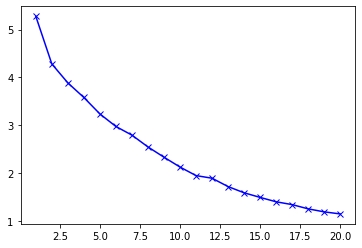

In [65]:
plt.plot(range(1, 21), kmeans_scores, '-bx')

#### As we can see, the 2nd option didn´t form the "elbow". So I´ll use the first one.

#### Step 2: Cluster with k = 5. 
#### After analysing the results with k=5, it seemed that too many clusters were similar and we could reduce the number of clusters.
#### Then, I reduced to 3 clusters and it seemed to include very different neighborhoods on the same clusters.
#### That´s why I decided to use k=4. It presents better results with a good quality separation between them.

In [279]:
k_labels = KMeans(n_clusters=4, random_state=0).fit(grouped_df).labels_

In [280]:
print(len(k_labels))
print(k_labels)

73
[1 3 0 3 0 0 0 0 1 1 2 0 0 1 0 1 0 0 1 1 3 1 1 2 3 1 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 3 3 1 0 1 0 3 0 1 1 0 2 1 1 1 0 1 0 0 0 0 3 1 0]


In [281]:
#Insert the labels on dataframe grouped_df.
grouped_df.insert(0, 'Labels', k_labels)

In [66]:
#grouped_df.head()

In [283]:
#Add Neighborhood names to different lists, accordingly to their specific label.
cluster_0 = grouped_df[grouped_df['Labels']==0].index.to_list()
cluster_1 = grouped_df[grouped_df['Labels']==1].index.to_list()
cluster_2 = grouped_df[grouped_df['Labels']==2].index.to_list()
cluster_3 = grouped_df[grouped_df['Labels']==3].index.to_list()
#cluster_4 = grouped_df[grouped_df['Labels']==4].index.to_list()

In [284]:
#Create new dfs using previously created nbhood_venues_df and the lists above 
#so we can see the neighborhoods in each cluster with their respective venues.
cluster_0_df = nbhood_venues_cat.loc[cluster_0]
cluster_1_df = nbhood_venues_cat.loc[cluster_1]
cluster_2_df = nbhood_venues_cat.loc[cluster_2]
cluster_3_df = nbhood_venues_cat.loc[cluster_3]
#cluster_4_df = nbhood_venues_cat.loc[cluster_4]

## Part 5
### Analysis after clustering.

In [285]:
#Unify dataframe by labels.
labels_df = grouped_df.groupby('Labels').sum()

In [67]:
#labels_df

In [287]:
#Cluster 0
labels_df.iloc[0].sort_values(ascending=False)[0:10]

Spanish Restaurant          51
Grocery Store               46
Tapas Restaurant            34
Supermarket                 32
Plaza                       31
Park                        30
Café                        27
Mediterranean Restaurant    23
Restaurant                  22
Pizza Place                 18
Name: 0, dtype: uint8

In [288]:
#Cluster 1
labels_df.iloc[1].sort_values(ascending=False)[0:10]

Restaurant                  93
Spanish Restaurant          88
Tapas Restaurant            80
Café                        74
Bakery                      73
Hotel                       63
Mediterranean Restaurant    62
Pizza Place                 55
Grocery Store               53
Bar                         52
Name: 1, dtype: uint8

In [289]:
#Cluster 2
labels_df.iloc[2].sort_values(ascending=False)[0:10]

Hotel                       43
Tapas Restaurant            16
Mediterranean Restaurant    14
Spanish Restaurant          14
Restaurant                  10
Japanese Restaurant         10
Cocktail Bar                 9
Bakery                       8
Hostel                       7
Boutique                     7
Name: 2, dtype: uint8

In [291]:
#Cluster 3
labels_df.iloc[3].sort_values(ascending=False)[0:10]

Tapas Restaurant            66
Mediterranean Restaurant    47
Bar                         35
Spanish Restaurant          32
Pizza Place                 27
Cocktail Bar                24
Restaurant                  24
Italian Restaurant          23
Café                        23
Plaza                       20
Name: 3, dtype: uint8

In [136]:
#labels_df.iloc[4].sort_values(ascending=False)[0:5]

#### Cluster 0 - "Diverse Neighborhoods" -  Neighborhoods with more diverse kinds of venues. More oriented to locals than tourists.
#### Cluster 1 - "Restauration Neighborhoods" - Strong presence of restaurants and bars/cafés.
#### Cluster 2 - "Touristic Hosting Neighborhoods" - Very small area concentrating a lot of Hotels.
#### Cluster 3 - "Amusement Neighborhoods" - Concentration of restaurants, bars and squares.
~~#### Cluster 4 - Strong predominance of hotels and secondly, restaurants.~~

## Part 6
### Create Barcelona´s map and plot all the relevant information on it.

#### Step 1.1: Create a df with the boroughs and criminal complaints that will be plotted on the map as a choropleth.

In [220]:
bor_crimes = bor_nei_df[['Borough', 'Criminal Complaints']].groupby('Borough').mean().sort_values(by='Criminal Complaints')

In [68]:
#bor_crimes

In [222]:
#Multiply the Criminal Complaints column by 1000 so we return the full amount on the map.
bor_crimes['Criminal Complaints'] = bor_crimes['Criminal Complaints']*1000

In [223]:
#Correct 'Horta - Guinardó' name removing the spaces in the middle 
#so we don´t get an error when cycling through the Bourough´s names when plotting the map.
bor_crimes.rename(index={'Horta - Guinardó':'Horta-Guinardó'}, inplace=True)

#### Step 1.2: Create colormap for criminal complaints and add the color codes on the previously created df. This color codes will be used to 'paint' each borough on the map.

In [224]:
#Create color scale for the amount of criminal complaints.
criminal_colormap = linear.Reds_08.scale(vmin=bor_crimes['Criminal Complaints'].min(), vmax=bor_crimes['Criminal Complaints'].max())

In [225]:
criminal_colormap

In [226]:
#Create colormap_codes and add them to bor_crimes df so we can plot the colors accordingly to the amount of criminal complaints
colormap_codes = []
for n in bor_crimes['Criminal Complaints']:
    colormap_codes.append(criminal_colormap(n))

In [227]:
bor_crimes['Criminal Colormap'] = colormap_codes

In [228]:
bor_crimes

,Criminal Complaints,Criminal Colormap
Borough,,
Les Corts,8627.0,#fff5f0ff
Nou Barris,9226.0,#fff4eeff
Gràcia,9722.0,#fff2ecff
Horta-Guinardó,9996.0,#fff1ebff
Sarrià-Sant Gervasi,11118.0,#ffeee6ff
Sant Andreu,12017.0,#ffece2ff
Sants-Montjuïc,25658.0,#fcad91ff
Sant Martí,27481.0,#fca385ff
Ciutat Vella,50436.0,#d42020ff


In [229]:
#Geojson file that will be used to plot the limits of each borough.
#We found the geojson per neighborhood on a user account in github (Tnks!)
#districts_limits = 'https://raw.githubusercontent.com/martgnz/bcn-geodata/master/districtes/districtes.geojson'

#### Step 2: Create Barcelona map with boroughs limits and plot the criminal colormap on it.

In [230]:
#Create Barcelona map.
bcn_map = folium.Map(location=[41.38879, 2.15899], zoom_start=12)


#Use geojson to plot the boroughs limits and plot the colors accordingly to previously created colormap.

#Explaining the parameter 'style_function = lambda feature': 
#it loops through the geojson file and, in this case, get the name of every borough (feature['properties']['NOM'][0])...
#...than 'fillColor' uses the name of the borough on the loop...
#...and get the respective color code on the dataframe created above (bor_crimes.at[borough_name, color_code]).

folium.GeoJson(districts_limits, 
               style_function=lambda feature:{"fillColor": bor_crimes.at[[feature["properties"]["NOM"]][0], 'Criminal Colormap'],
                                             "fillOpacity": 0.7,
                                             "color": "gray",
                                             "weight": 1,
                                             "dashArray": "5, 5"
                                             }).add_to(bcn_map)

#Add Criminal Complaints title and scale.
criminal_colormap.caption = 'Amount of Criminal Complaints'
criminal_colormap.add_to(bcn_map)


bcn_map

#### Step 3: Create final dataframe, plot_df, and plot all the information on the map.

In [292]:
#The dataframe will contain the name of the neighborhood, it´s latitude, longitude, prices and labels.
plot_df = bcn_final_df[['Neighborhood', 'Latitude', 'Longitude']].merge(price_crime_df, on='Neighborhood').merge(grouped_df['Labels'], on='Neighborhood')

plot_df.drop_duplicates(inplace=True)

plot_df.drop('Criminal Complaints', axis=1, inplace=True)

plot_df.reset_index(drop=True, inplace=True)

In [69]:
#plot_df

In [293]:
#It seems that the popup parameter on folium´s CircleMarker has a problem with some special characters on the strings,
#So we made this little loop in order to substitute all characters that might have been causing the map not to be plotted.
for e, n in enumerate(plot_df['Neighborhood']):
    if "'" in n:        
        plot_df.at[e, 'Neighborhood'] = n.replace("'", "_")      

In [294]:
#Add markers colored by the label number
for neigh, lat, lon, label, price in zip(plot_df['Neighborhood'], plot_df['Latitude'], plot_df['Longitude'], plot_df['Labels'], plot_df['Price/m2']):
        if label == 0:
            folium.CircleMarker(location=[lat, lon], color='#ff9900', fill=True, popup='<b>' + neigh + '<hr></b>' + '<b> Cluster: </b>' + str(label) + '<br><b>Price/m2: </b>' + str(price)).add_to(bcn_map)
        elif label == 1:
            folium.CircleMarker(location=[lat, lon], color='#00ff99', fill=True, popup='<b>' + neigh + '<hr></b>' + '<b> Cluster: </b>' + str(label) + '<br><b>Price/m2: </b>' + str(price)).add_to(bcn_map)
        elif label == 2:
            folium.CircleMarker(location=[lat, lon], color='#9999ff', fill=True, popup='<b>' + neigh + '<hr></b>' + '<b> Cluster: </b>' + str(label) + '<br><b>Price/m2: </b>' + str(price)).add_to(bcn_map)
        elif label == 3:
            folium.CircleMarker(location=[lat, lon], color='#ff00ff', fill=True, popup='<b>' + neigh + '<hr></b>' + '<b> Cluster: </b>' + str(label) + '<br><b>Price/m2: </b>' + str(price)).add_to(bcn_map)
#        elif label == 4:
#            folium.CircleMarker(location=[lat, lon], color='#cccc00', fill=True, popup='<b>' + neigh + '<hr></b>' + '<b> Cluster: </b>' + str(label) + '<br><b>Price/m2: </b>' + str(price)).add_to(bcn_map)
    

In [295]:
bcn_map